In [1]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup
import re 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
!pip install seaborn
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

You are using pip version 9.0.3, however version 19.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
df=pd.read_csv('all_flow_classes.csv')
df.head(5)

,project_id,project_location_id,precision_code,geoname_id,place_name,latitude,longitude,location_type_code,location_type_name,gazetteer_adm_code,...,loan_type,interest_rate,maturity,grace_period,grant_element,location_details,contacts,source_triangulation,field_completeness,round_coded
0,1,1_2377450,1,2377450,Nouakchott,18.08581,-15.97850,PPLC,capital of a political entity,6295630|6255146|MR|NKC|2377450,...,NaN,NaN,NaN,NaN,NaN,NaN,"Zhang Xun, ; Cheikh Ould Horma,",3,6,ChinatoAfrica
1,1,1_2376719,1,2376719,Sélibaby,15.15846,-12.18430,PPLA,seat of a first-order administrative division,6295630|6255146|MR|10|2376719,...,NaN,NaN,NaN,NaN,NaN,NaN,"Zhang Xun, ; Cheikh Ould Horma,",3,6,ChinatoAfrica
2,1,1_2378538,1,2378538,Kiffa,16.61659,-11.40453,PPLA,seat of a first-order administrative division,6295630|6255146|MR|03|2378538,...,NaN,NaN,NaN,NaN,NaN,NaN,"Zhang Xun, ; Cheikh Ould Horma,",3,6,ChinatoAfrica
3,1,1_2378080,6,2378080,Mauritania,NaN,NaN,PCLI,independent political entity,6295630|6255146|MR,...,NaN,NaN,NaN,NaN,NaN,NaN,"Zhang Xun, ; Cheikh Ould Horma,",3,6,ChinatoAfrica
4,3,3_2377450,1,2377450,Nouakchott,18.08581,-15.97850,PPLC,capital of a political entity,6295630|6255146|MR|NKC|2377450,...,Concessional,2.0,20.0,5.0,54.08,Nouakchott,"Zhai Jun, ; Zhang Xun, ; Mohamed Ould Abdel Az...",8,8,ChinatoAfrica


Investment sorted by Sector Types

In [3]:
sns.set(style='whitegrid')

/Users/tongxucai/.pyenv/versions/3.6.5/lib/python3.6/site-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


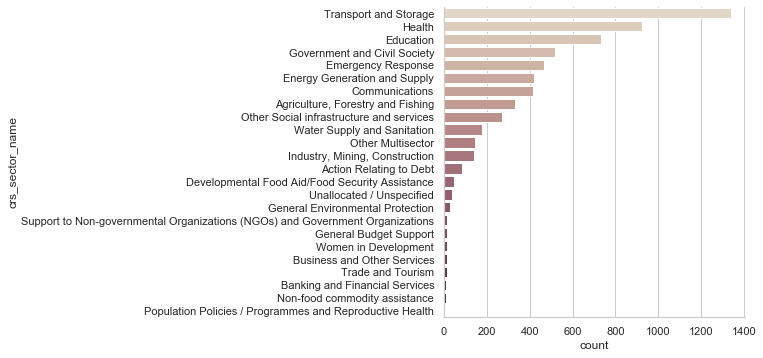

In [4]:
sector = list(df["crs_sector_name"].value_counts().index)
sns.catplot(y="crs_sector_name", kind="count", palette="ch:.25", data=df, order=sector);

Investment sorted by countries

In [5]:
df['gazetteer_adm_name'].value_counts().head(15)

Earth|Asia|Cambodia           92
Earth|Africa|Zimbabwe         55
Earth|Africa|Kenya            42
Earth|Africa|Liberia          42
Earth|Africa|Zambia           41
Earth|Africa|Tanzania         38
Earth|Africa|Niger            37
Earth|Asia|Myanmar [Burma]    36
Earth|Africa|Uganda           34
Earth|Africa|Ghana            34
Earth|Africa|Lesotho          30
Earth|Asia|Laos               28
Earth|Africa|Sierra Leone     28
Earth|Asia|Pakistan           27
Earth|Africa|Ethiopia         27
Name: gazetteer_adm_name, dtype: int64

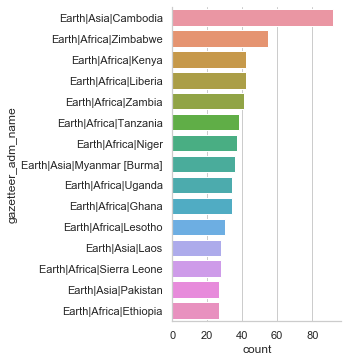

In [6]:
location = list(df['gazetteer_adm_name'].value_counts().head(15).index)
sns.catplot(y='gazetteer_adm_name',kind='count',
            data=df[df['gazetteer_adm_name'].isin(location)],
            order=location)

Investment sorted by Continents

In [7]:
df['Continent'] = df['gazetteer_adm_name'].str.extract(r'Earth\|(\w*)\|.*')

In [8]:
df['Country']=df['gazetteer_adm_name'].str.extract(r'Earth\|\w*\|(\w*).*')

In [9]:
df.to_csv('first-all.csv',index=False)

In [10]:
firstall=pd.read_csv('first-all.csv')

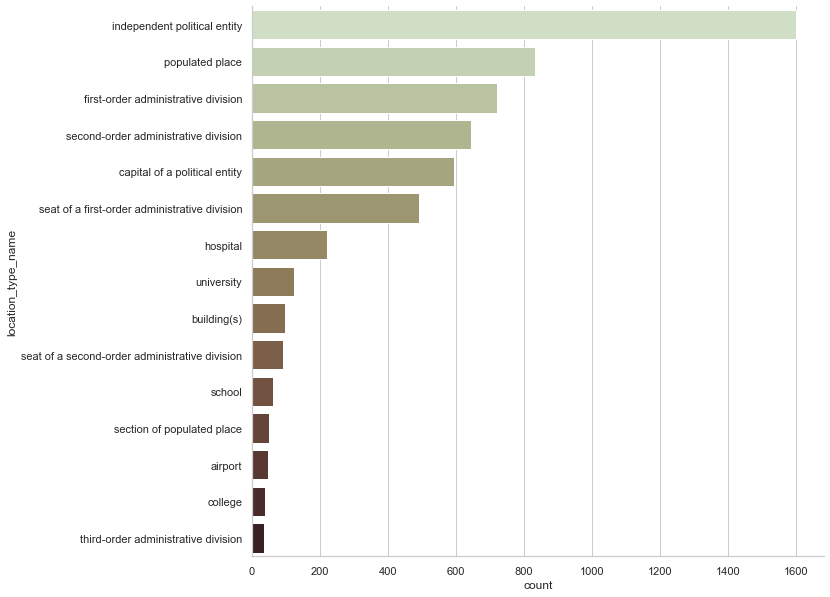

In [11]:
locationtype=list(firstall['location_type_name'].value_counts().head(15).index)
sns.catplot(y='location_type_name',kind='count',data=firstall,order=locationtype, 
            height=8.27, aspect=11.7/8.27,palette='ch:0.7')
# plt.savefig('locationtype.png')

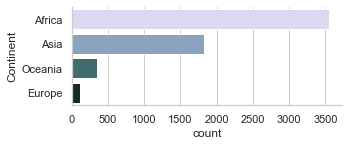

In [12]:
Continent=list(firstall['Continent'].value_counts().index)
sns.catplot(y='Continent',kind='count',data=firstall,order=Continent,height=2,palette='ch:2',aspect=20.7/8.27)
# plt.savefig('Continent.png')


In [13]:
pd.crosstab(firstall['Continent'], firstall['crs_sector_name'])

crs_sector_name,Action Relating to Debt,"Agriculture, Forestry and Fishing",Banking and Financial Services,Business and Other Services,Communications,Developmental Food Aid/Food Security Assistance,Education,Emergency Response,Energy Generation and Supply,General Budget Support,...,Non-food commodity assistance,Other Multisector,Other Social infrastructure and services,Population Policies / Programmes and Reproductive Health,Support to Non-governmental Organizations (NGOs) and Government Organizations,Trade and Tourism,Transport and Storage,Unallocated / Unspecified,Water Supply and Sanitation,Women in Development
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,70,230,9,5,327,31,389,125,243,3,...,3,83,167,6,6,9,600,18,146,11
Asia,11,54,3,4,59,13,185,263,132,8,...,4,50,51,0,8,1,593,12,28,1
Europe,0,3,0,1,5,2,39,10,6,2,...,0,0,3,0,1,0,25,2,0,0
Oceania,2,23,1,1,3,3,58,15,9,1,...,2,7,16,0,0,3,56,6,2,2


In [14]:
calculated = pd.crosstab(firstall['Continent'], firstall['crs_sector_name']) \
                .reset_index().melt('Continent')
calculated=calculated.drop(calculated[calculated['value']<20].index)
calculated

,Continent,crs_sector_name,value
0,Africa,Action Relating to Debt,70
4,Africa,"Agriculture, Forestry and Fishing",230
5,Asia,"Agriculture, Forestry and Fishing",54
7,Oceania,"Agriculture, Forestry and Fishing",23
16,Africa,Communications,327
17,Asia,Communications,59
20,Africa,Developmental Food Aid/Food Security Assistance,31
24,Africa,Education,389
25,Asia,Education,185
26,Europe,Education,39


In [15]:
!pip install -U altair vega_datasets notebook vega

Requirement already up-to-date: altair in /Users/tongxucai/.pyenv/versions/3.6.5/lib/python3.6/site-packages
Requirement already up-to-date: vega_datasets in /Users/tongxucai/.pyenv/versions/3.6.5/lib/python3.6/site-packages
Requirement already up-to-date: notebook in /Users/tongxucai/.pyenv/versions/3.6.5/lib/python3.6/site-packages
Requirement already up-to-date: vega in /Users/tongxucai/.pyenv/versions/3.6.5/lib/python3.6/site-packages
Requirement already up-to-date: pandas in /Users/tongxucai/.pyenv/versions/3.6.5/lib/python3.6/site-packages (from altair)
Requirement already up-to-date: jinja2 in /Users/tongxucai/.pyenv/versions/3.6.5/lib/python3.6/site-packages (from altair)
Requirement already up-to-date: numpy in /Users/tongxucai/.pyenv/versions/3.6.5/lib/python3.6/site-packages (from altair)
Requirement already up-to-date: six in /Users/tongxucai/.pyenv/versions/3.6.5/lib/python3.6/site-packages (from altair)
Requirement already up-to-date: toolz in /Users/tongxucai/.pyenv/vers

In [16]:
import altair as alt
from vega_datasets import data
!pip install selenium
alt.renderers.enable('notebook')

You are using pip version 9.0.3, however version 19.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


RendererRegistry.enable('notebook')

In [17]:
color_scale = alt.Scale(
    domain=["Asia","Africa","Oceania","Europe"],
    range=["#d9534f", "#f9f9f9", "#5bc0de", "#5cb85c"])

y_axis = alt.Axis(
    title='Continent',offset=4,ticks=False,minExtent=70,domain=False)

chart=alt.Chart(calculated).mark_bar().encode(
    y='crs_sector_name',
    x='value',
    color=alt.Color(
        'Continent',
        legend=alt.Legend(title='Continent')
    )
)


chart.save('Continent_Sector.svg')

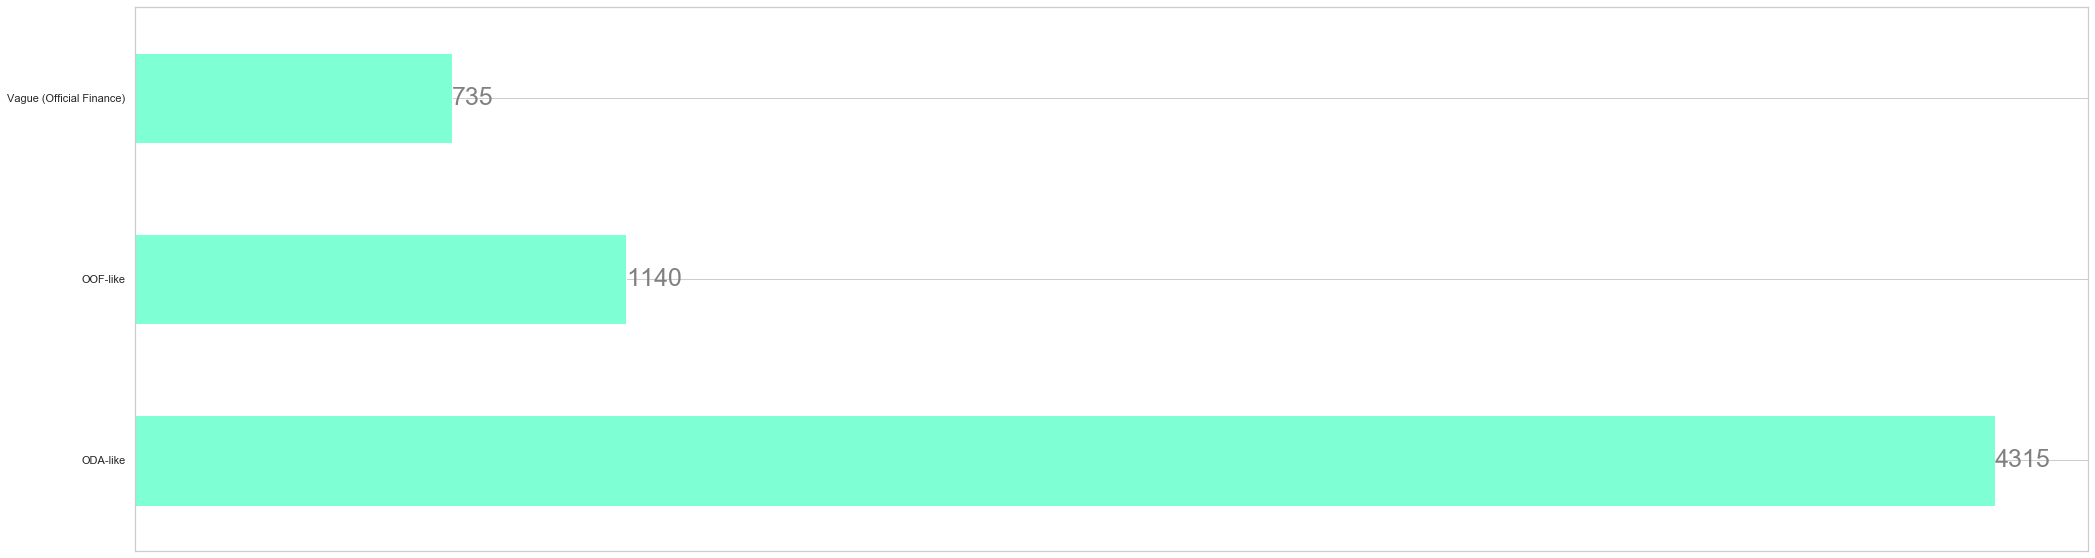

In [18]:
#measuring investment types
ax=df['flow_class'].value_counts().plot(kind='barh',figsize=(35,10),color='aquamarine')
for i in ax.patches:
    ax.text(i.get_width()+.1, i.get_y()+.21, \
            str(round((i.get_width()), 2)), fontsize=25, color='grey')
    ax.set_xticks([])
plt.savefig('flowclass.pdf')

In [19]:
firstall['Country'].value_counts().head(10)
#Tanzania receives the most amount of investments.

Tanzania    338
Cambodia    318
Sri         227
Angola      208
Kenya       205
Pakistan    190
Uganda      162
Zambia      150
Ghana       149
Ethiopia    144
Name: Country, dtype: int64

In [20]:
#measure amount total. 
firstall['amount'].sum(axis= 0, skipna = True) 

18818533687257.0

In [21]:
firstall['amount']=firstall['amount'].fillna(0)

In [22]:
#converting units in ['amount']
firstall['amount']=firstall['amount']/1000000000
firstall['amount']

0       0.00000
1       0.00000
2       0.00000
3       0.00000
4       2.00000
         ...   
6185    0.00105
6186    0.00200
6187    0.00200
6188    0.00200
6189    0.00200
Name: amount, Length: 6190, dtype: float64

In [23]:
firstall[['amount','Country']].sort_values(by='amount',ascending=False)
#Vietnam gets the most amount of investment.

,amount,Country
3365,975.0,Vietnam
3363,975.0,Vietnam
3364,975.0,Vietnam
3366,975.0,Vietnam
3367,975.0,Vietnam
3368,975.0,Vietnam
3369,975.0,Vietnam
3105,725.0,Laos
3090,570.0,Laos
4707,430.0,Laos


In [24]:
df.amount.describe()

count    3.970000e+03
mean     4.740185e+09
std      4.743072e+10
min      1.500000e+03
25%      5.000000e+06
50%      5.893871e+07
75%      2.500000e+08
max      9.750000e+11
Name: amount, dtype: float64

In [25]:
firstall[firstall.Country=='Tanzania'].amount.sum()

296.497094108

In [26]:
firstall[firstall.Country=='Vietnam'].amount.sum()

6831.187144998999

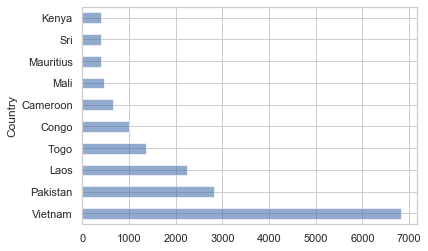

In [50]:
firstall.groupby(by='Country').amount.sum().sort_values(ascending=False).head(10).plot(kind='barh',
                                                                                      alpha=0.6)
plt.savefig('mostamount.pdf')


In [28]:
(firstall.Country=='Vietnam').sum()
#how many investments in Vietnam, the country receives the most amount of money. 

89

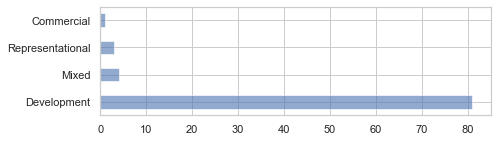

In [51]:
df[firstall.Country=='Vietnam'].intent.value_counts().plot(kind='barh',alpha=0.6,width=0.5,figsize=(7,2))
plt.savefig('Vietnamaidtyps.pdf')


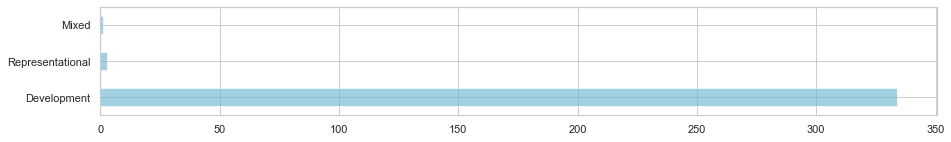

In [53]:
df[firstall.Country=='Tanzania'].intent.value_counts().plot(kind='barh',color='c',alpha=0.6,width=0.5,figsize=(15,2))
plt.savefig('Tanzaniaaidtype.pdf')


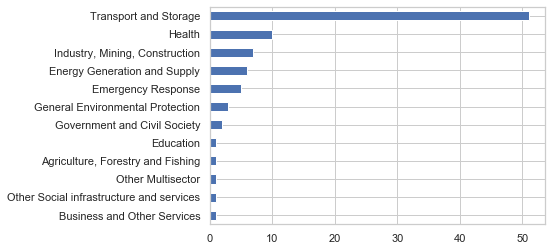

In [54]:
vietnam=df[firstall.Country=='Vietnam']
vietnam['ad_sector_names'].value_counts().sort_values().plot(kind='barh')
#break down Vietnam's investment types 
plt.savefig('v-investmenttype.pdf')

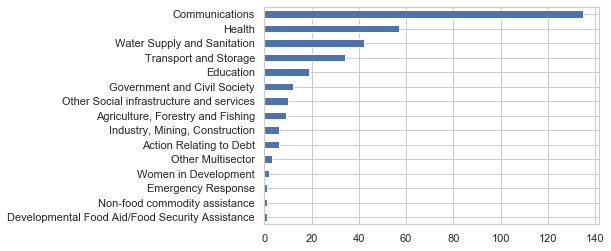

In [55]:
Tanzania=df[firstall.Country=='Tanzania']
Tanzania['ad_sector_names'].value_counts().sort_values().plot(kind='barh')
plt.savefig('t-investmenttype.pdf')

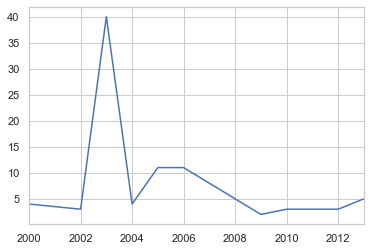

In [56]:
vy=vietnam['year'].value_counts().sort_index()
vy.plot()
plt.savefig('v-byyear.pdf')

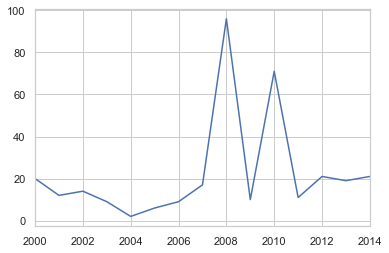

In [57]:
ty=Tanzania['year'].value_counts().sort_index()
ty.plot()
plt.savefig('t-byyear.pdf')